In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import os
os.environ["SPOTIPY_CLIENT_ID"] = 'b1511210915a4096988d72740d6d9b51'
os.environ["SPOTIPY_CLIENT_SECRET"] = '5c79e21e3a5e459792400e570e6e1d27'
sp = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(requests_timeout=None))

In [4]:
import numpy as np
import pandas as pd
import random
import sys

def search_genre(genre, offset=0, max_n=None):
    if max_n is None:
        max_n = sp.search(q=f'genre:"{genre}"', offset=0, limit=1, type='track').get('tracks').get('total')
    if max_n <= 50:
        search = sp.search(q=f'genre:"{genre}"', offset=offset, limit=max_n, type='track').get('tracks')
    else:
        search = {}
        search['total'] = 0
        search['items'] = []
        while search['total'] < max_n:
            step = search['total']+1
            print(f'\r[{step}/{max_n}] (search)', end='')
            num = min(50, max_n-search['total'])
            try:
                tmp = sp.search(q=f'genre:"{genre}"', offset=offset+search['total'], limit=num, type='track').get('tracks')
            except:
                break
            search['items'].extend(tmp.get('items'))
            search['total'] += len(tmp.get('items'))
    return search

def crawl(genres):
    variables = ['id', 
                 'name', 
                 'artist', 
                 'genre', 
                 'popularity', 
                 'acousticness', 
                 'danceability',
                 'energy',
                 'instrumentalness',
                 'liveness',
                 'speechiness',
                 'duration_ms',
                 'key',
                 'loadness',
                 'mode',
                 'tempo',
                 'valence',
                 'available_market',
                 'release_date',
                 'explicit']
    columns = {v:[] for v in variables}
    data = pd.DataFrame(data=columns)
    for i, genre in enumerate(genres):
#         results = search_genre(genre)
#         n = results.get('total')
#         for j, result in enumerate(results.get('items')):
        n = sp.search(q=f'genre:"{genre}"', offset=0, limit=1, type='track').get('tracks').get('total')
        if n == 0:
            continue
        offsets = random.sample(list(np.arange(min(n-1, 1999))), k=min(n, 100))
        for j, offset in enumerate(offsets):
#             print(f'\r[{j+1}/{n}] (process)', end='')
            print(f'\r[{j+1}/{len(offsets)}] (process)', end='')
            items = search_genre(genre, offset=offset, max_n=1).get('items')
            if items is None:
                continue
            result = items[0]
#             if result is None: # do not find track
#                 continue
            feature = sp.audio_features(result.get('id'))[0]
            row = {
                'id': result.get('id'), 
                'name': result.get('name'), 
                'artist': result.get('artists')[0].get('name'), 
                'genre': genre, 
                'popularity': result.get('popularity'),
                'available_market': len(result.get('available_markets')),
                'duration_ms': result.get('duration_ms'),
                'explicit': result.get('explicit'), # has explicit lyrics
                'release_date': result.get('album').get('release_date'),
                'acousticness': feature.get('acousticness'), 
                'danceability': feature.get('danceability'),
                'energy': feature.get('energy'),
                'instrumentalness': feature.get('instrumentalness'),
                'liveness': feature.get('liveness'),
                'speechiness': feature.get('speechiness'),
                'key': feature.get('key'),
                'loadness': feature.get('loudness'),
                'mode': feature.get('mode'),
                'tempo': feature.get('tempo'),
                'valence': feature.get('valence')
            }
            
            data = data.append(row, ignore_index=True)
        print(f'\r[{i+1}/{len(genres)}] genre: {genre}'.rjust(20, ' '))
    return data

In [5]:
random.seed(113)
np.random.seed(113)
allGenres = sp.recommendation_genre_seeds()['genres']
data = crawl(allGenres)

[1/126] genre: acoustic
[2/126] genre: afrobeat
[3/126] genre: alt-rock
[4/126] genre: alternative
[5/126] genre: ambient
[6/126] genre: anime
[7/126] genre: black-metal
[8/126] genre: bluegrass
[9/126] genre: blues
[11/126] genre: brazil
[12/126] genre: breakbeat
[13/126] genre: british
[14/126] genre: cantopop
[15/126] genre: chicago-house
[16/126] genre: children
[17/126] genre: chill
[18/126] genre: classical
[19/126] genre: club
[20/126] genre: comedy
[21/126] genre: country
[22/126] genre: dance
[23/126] genre: dancehall
[24/126] genre: death-metal
[25/126] genre: deep-house
[26/126] genre: detroit-techno
[27/126] genre: disco
[28/126] genre: disney
[29/126] genre: drum-and-bass
[30/126] genre: dub
[31/126] genre: dubstep
[32/126] genre: edm
[33/126] genre: electro
[34/126] genre: electronic
[35/126] genre: emo
[36/126] genre: folk
[37/126] genre: forro
[38/126] genre: french
[39/126] genre: funk
[40/126] genre: garage
[41/126] genre: german
[42/126] genre: gospel
[43/126] genre:

In [7]:
print('head:')
display(data.head())

head:


,id,name,artist,genre,popularity,acousticness,danceability,energy,instrumentalness,liveness,speechiness,duration_ms,key,loadness,mode,tempo,valence,available_market,release_date,explicit
0,18k8IlS52uxRWObykDUZFG,The Joke,Brandi Carlile,acoustic,61.0,0.327,0.236,0.578,0.00015,0.2060,0.0404,279373.0,7.0,-5.477,1.0,75.367,0.227,79.0,2018-02-16,0.0
1,6UkkUNDtjsSiPbEgnOPG4C,Wendigo,Penny and Sparrow,acoustic,40.0,0.553,0.416,0.297,0.00000,0.0706,0.0425,137872.0,8.0,-8.998,0.0,120.100,0.375,79.0,2017-09-01,0.0
2,6tyet1qdKaRRYNfZ3BtvFj,Blue Mind,Alexi Murdoch,acoustic,40.0,0.564,0.640,0.296,0.52500,0.0930,0.0324,315813.0,11.0,-20.646,1.0,117.374,0.285,79.0,2002-01-01,0.0
3,4kQF23eYkc18zXyvyqSFjz,I Still Care for You,Ray LaMontagne,acoustic,36.0,0.187,0.320,0.708,0.32300,0.1080,0.0318,247186.0,7.0,-9.822,0.0,178.696,0.285,51.0,2009-03-04,0.0
4,5DhoBZDBZCSKCGLVnDWBST,Kinks Shirt,Matt Nathanson,acoustic,36.0,0.211,0.705,0.795,0.00000,0.1680,0.0784,179973.0,1.0,-3.868,0.0,81.994,0.850,77.0,2013-01-01,0.0


In [8]:
data.to_csv('tracks.csv')

In [36]:
len(data['name'].unique())

10502

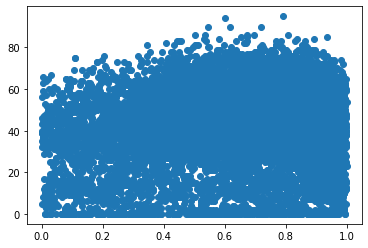

In [45]:
import matplotlib.pyplot as plt
plt.scatter(data['energy'], data['popularity'])
plt.show()

In [80]:
cov = np.corrcoef(data.iloc[:, (data.dtypes != object).values], rowvar=False)

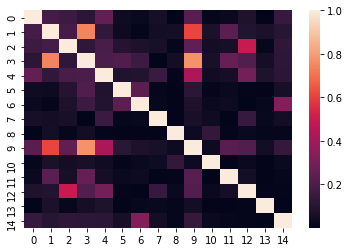

In [89]:
import seaborn as sns
sns.heatmap(np.abs(cov))

In [90]:
np.argsort(np.abs(cov[3,:]))

array([ 7,  8, 13, 10,  0, 14,  2,  6,  4,  5, 12, 11,  1,  9,  3],
      dtype=int64)

In [91]:
cov[3,:]

array([ 0.11709461, -0.74352526,  0.12498016,  1.        , -0.1964861 ,
        0.21067149,  0.16188414, -0.00251388,  0.05029022,  0.77700268,
       -0.06336495,  0.26287597,  0.21431181, -0.05623611,  0.11826033])

In [87]:
data.iloc[:, (data.dtypes != object).values]

,popularity,acousticness,danceability,energy,instrumentalness,liveness,speechiness,duration_ms,key,loadness,mode,tempo,valence,available_market,explicit
0,61.0,0.32700,0.236,0.578,0.000150,0.2060,0.0404,279373.0,7.0,-5.477,1.0,75.367,0.2270,79.0,0.0
1,40.0,0.55300,0.416,0.297,0.000000,0.0706,0.0425,137872.0,8.0,-8.998,0.0,120.100,0.3750,79.0,0.0
2,40.0,0.56400,0.640,0.296,0.525000,0.0930,0.0324,315813.0,11.0,-20.646,1.0,117.374,0.2850,79.0,0.0
3,36.0,0.18700,0.320,0.708,0.323000,0.1080,0.0318,247186.0,7.0,-9.822,0.0,178.696,0.2850,51.0,0.0
4,36.0,0.21100,0.705,0.795,0.000000,0.1680,0.0784,179973.0,1.0,-3.868,0.0,81.994,0.8500,77.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11195,36.0,0.15900,0.282,0.277,0.004090,0.1020,0.0299,291560.0,8.0,-12.771,0.0,93.407,0.0869,79.0,0.0
11196,62.0,0.00985,0.420,0.823,0.000000,0.1030,0.0434,244040.0,1.0,-4.889,1.0,163.997,0.5170,79.0,0.0
11197,37.0,0.40800,0.484,0.567,0.000825,0.0783,0.0307,352634.0,0.0,-9.111,1.0,142.041,0.2070,79.0,0.0
11198,56.0,0.17500,0.253,0.417,0.000000,0.0973,0.0434,412119.0,6.0,-10.358,1.0,118.230,0.1190,79.0,0.0


In [ ]:
# plt.hist([data])
# plt.show()

In [ ]:
# sorted(data)